In [2]:
#
# pre-processing SPADE modified for 6 vs 9
#
# SPADE69_preprocessing(y, sigma, n)
#
# where:
#   y is 28x28 array (from MNIST)
#   sigma is blurring parameter (float)
#   n is number of photons (int)

import torch
import numpy as np
import matplotlib.pyplot as plt
from torchvision.datasets import MNIST, FashionMNIST
import torch
import numpy as np
import matplotlib.pyplot as plt

import numpy as np
from random import choices

####

def SPADE69_intensity(y, sigma, f): # sigma >0
    med = 14
    mid = 14
    
    ## order 0
    HG00 = np.sum( [[y[i,j] * np.exp( -( (i-med)**2 + (j-med)**2 ) / (4 * (sigma/f)**2) ) 
                     for i in range(28)] for j in range(28)] )
    # order 1: x
    HG01 = np.sum( [[y[i,j] * ( f*(j-med) )**2 * np.exp( -( (i-med)**2 + (j-med)**2 ) / (4 * (sigma/f)**2)) 
                     for i in range(28)] for j in range(28)] ) / (4 * sigma**2)

    # mixed 1 & 2
    fyp = np.sum( [[y[u,v]*( ( f*(u-mid) )**2 + ( f*(u-mid) )**4 + 2*( f*(u-mid) )**3 ) * np.exp( -( (u-med)**2 + (v-med)**2 ) / (4 * (sigma/f)**2))
                   for u in range(28)] for v in range(28)] ) / ( (2*sigma)**2 + 2*(2*sigma)**4 ) 
    
    fym = np.sum( [[y[u,v]*( (2*(2*sigma)**2)*( f*(u-mid) )**2 + ( f*(u-mid) )**4/2/(2*sigma)**2 - 2*( f*(u-mid) )**3 ) * np.exp( -( (u-med)**2 + (v-med)**2 ) / (4 * (sigma/f)**2)) 
                   for u in range(28)] for v in range(28)] ) / ( (2*sigma)**2 + 2*(2*sigma)**4 ) 

    # order 2: xx
    HG02 = np.sum( [[y[i,j] * ( f*(j-med) )**4 * np.exp( -( (i-med)**2 + (j-med)**2 ) / (4 * (sigma/f)**2)) 
                     for i in range(28)] for j in range(28)] ) / (32 * sigma**4)
    
    ## order 2: 11
    HG11 = np.sum( [[y[i,j] * ( f*(j-med) )**2 * ( f*(i-med) )**2 * np.exp( -( (i-med)**2 + (j-med)**2 ) / (4 * (sigma/f)**2) ) 
                     for i in range(28)] for j in range(28)] ) / (16 * sigma**4)


    ## order 3
    HG03 = np.sum( [[y[i,j] * ( f*(j-med) )**6 * np.exp( -( (i-med)**2 + (j-med)**2 ) / (4 * (sigma/f)**2) ) 
                     for i in range(28)] for j in range(28)] ) / (2 * sigma)**6 / 6
    
    HG12 = np.sum( [[y[i,j] * ( f*(j-med) )**4 * ( f*(i-med) )**2 * np.exp( -( (i-med)**2 + (j-med)**2 ) / (4 * (sigma/f)**2) ) 
                     for i in range(28)] for j in range(28)] ) / (2 * sigma)**6 / 2
    
    HG21 = np.sum( [[y[i,j] * ( f*(j-med) )**2 * ( f*(i-med) )**4 * np.exp( -( (i-med)**2 + (j-med)**2 ) / (4 * (sigma/f)**2) ) 
                     for i in range(28)] for j in range(28)] ) / (2 * sigma)**6 / 2
    
    HG30 = np.sum( [[y[i,j] * ( f*(i-med) )**6 * np.exp( -( (i-med)**2 + (j-med)**2 ) / (4 * (sigma/f)**2) ) 
                     for i in range(28)] for j in range(28)] ) / (2 * sigma)**6 / 6
    
    norm = HG00 + HG01 + fyp + fym + HG02 + HG11 + HG03 + HG12 + HG21 + HG30
    pHG00 = HG00 / norm
    pHG01 = HG01 / norm
    pyp = fyp / norm  ### feature importante
    pym = fym / norm  ### feature importante
    pHG02 = HG02 / norm
    pHG11 = HG11 / norm
    pHG03 = HG03 / norm
    pHG12 = HG12 / norm
    pHG21 = HG21 / norm
    pHG30 = HG30 / norm
    return pHG00, pHG01, pyp, pym, pHG02, pHG11, pHG03, pHG12, pHG21, pHG30#, norm

# input vec is normalised propability
def SPADE69_sampling(vec, n):
    pvals = vec
    #print(pvals)
    
    if n==0:
        return pvals

    else:
        data = np.random.multinomial(n, pvals, size=1)
        data = data/ np.sum(data)
        #return [ data[0,1], data[0,2], data[0,3], data[0,4], data[0,5] ]
        return [ data[0,0], data[0,1], data[0,2], data[0,3], data[0,4], data[0,5], data[0,6], data[0,7], data[0,8], data[0,9] ]

# funzione principale
def SPADE69_preprocessing(y, sigma, f, n):
    vec = SPADE69_intensity(y, sigma,f)
    return SPADE69_sampling(vec, n)
    

In [3]:
#Extract the classes out of the dataset
class0 = 6
class1 = 9

train_dataset = MNIST(root='./data', train=True, download=True)

xtrain = train_dataset.data[(train_dataset.targets == class0)|(train_dataset.targets == class1)].data.numpy() #.astype(float)[0:sample] 
xtarge = train_dataset.targets[(train_dataset.targets == class0) | (train_dataset.targets == class1)].data.numpy()

In [5]:
print( SPADE69_intensity(y=x_train[1], sigma=9.5, f=1.3) )

(0.8373187808467338, 0.05185090918446901, 0.011879220449402072, 0.08989465373541562, 0.003305549529318069, 0.00326640289735783, 0.00017694854601518086, 0.00015427183338879142, 0.0003965646730750567, 0.0017566983048245839)
7.3076923076923075


In [8]:

#We now preprocess the entire dataset, fixing sigma and varing the scaling factor f

sigma=9.5
valori_f = [ 1.3 , 1.2 , 1.1 , 1.0 , 0.9 , 0.8 , 0.7 , 0.6 , 0.5 ]
N=[100,500,1000,5000,10000,15000,20000]
def datas_mult(X,N,sigma):
    D=[[[0 for i in range(len(N))] for j in range(len(valori_f))] for z in range(len(xtrain))]
    for i in range(len(xtrain)):
        for j in range(len(N)):
            for z in range(len(valori_f)):
                D[i][z][j]=np.array(SPADE69_preprocessing(xtrain[i], sigma=sigma,f=valori_f[z],n=N[j]))
               
    return D
pre_data=np.array(datas_mult(xtrain,N,sigma))
np.save("preproc_f_69_hN2.npy",pre_data)

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score

valori_f=np.array([ 1.3 , 1.2 , 1.1 , 1.0 , 0.9 , 0.8 , 0.7 , 0.6 , 0.5 ])
N=np.array([100,500,1000,5000,10000,15000,20000])

y=train_dataset.targets[(train_dataset.targets == class0)|(train_dataset.targets == class1)].numpy()
y=torch.from_numpy(y).to(torch.float64)

accuracy,stdev=[[0 for i in range(len(N))] for j in range(len(valori_f))],[[0 for i in range(len(N))] for j in range(len(valori_f))]
#hyperparametrs

n_estimator=200 #number of trees in the random forest
cc= 20 #number of crossvalidations

for a in range(len(sigma)):
    for b in range(len(N)):
        X_train, X_test, y_train, y_test = train_test_split(stt[:,a,b,:]
                                                            ,y, test_size=0.3,
                                                            shuffle=True,
                                                            stratify=y)
        
        
        rf_clf = RandomForestClassifier(n_estimators=n_estimator)
        rf_clf.fit(X_train, y_train)
        cv_score_rf = cross_val_score(rf_clf, X_test, y_test, cv= cc,
                                      scoring = "accuracy")
        cv_score_rf_m = np.mean(cv_score_rf)
        cv_score_rf_std=np.std(cv_score_rf)
        accuracy[a][b]=cv_score_rf_m
        stdev[a][b]=cv_score_rf_std
        
        print(cv_score_rf_m,cv_score_rf_std)



(9256, 10)
0.5136641221374045 0.03673578097347757
(9256, 10)
0.548041691133294 0.029657181774740263
(9256, 10)
0.5905578391074574 0.042004465467048224
(9256, 10)
0.6664210217263651 0.031851082622665346
(9256, 10)
0.6939929536112741 0.035196307579483915
(9256, 10)
0.7364562536699941 0.0316961017109278
(9256, 10)
0.7257251908396947 0.03575802135743713
(9256, 10)
0.5155020551967116 0.03240198787663457
(9256, 10)
0.574906048150323 0.044721052208124785
(9256, 10)
0.5958866705813269 0.04015270213326088
(9256, 10)
0.6594920728126834 0.036323705178927614
(9256, 10)
0.6874779800352318 0.03991815696982293
(9256, 10)
0.7180857310628304 0.04462591941372631
(9256, 10)
0.7330240751614797 0.03553032972223433
(9256, 10)
0.5163241338813858 0.04763668437887712
(9256, 10)
0.5488490898414563 0.04012257704520998
(9256, 10)
0.5832677627715795 0.03563684188298641
(9256, 10)
0.6571990604815032 0.0432455420585762
(9256, 10)
0.6970493247210803 0.04024494556814451
(9256, 10)
0.72 0.03132939712372752
(9256, 10)
0

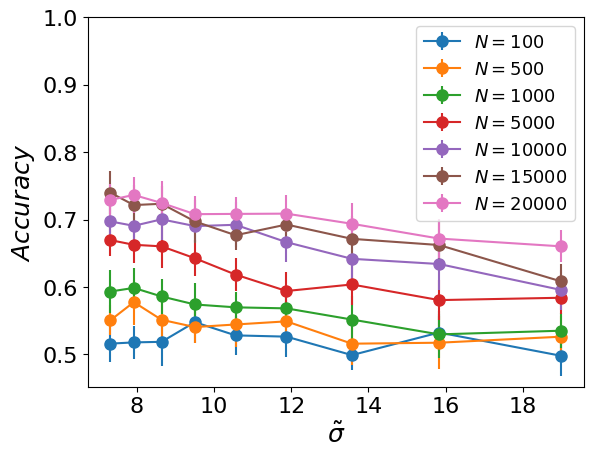

In [23]:
import matplotlib.pyplot as plt
import numpy as np
sigma_real=9.5/np.array([ 1.3 , 1.2 , 1.1 , 1.0 , 0.9 , 0.8 , 0.7 , 0.6 , 0.5 ])
accuracy=np.array(accuracy)
stdev=np.array(stdev)
plt.errorbar(sigma_real, list((accuracy[:,0])), yerr=stdev[:,0], label='$N=100$',marker='o', markersize=8)

plt.errorbar(sigma_real, list((accuracy[:,1])), yerr=stdev[:,1], label='$N=500$',marker='o', markersize=8)

plt.errorbar(sigma_real, list((accuracy[:,2])), yerr=stdev[:,2],
             label='$N=1000$',marker='o', markersize=8)

plt.errorbar(sigma_real, list((accuracy[:,3])), yerr=stdev[:,3],
             label='$N=5000$',marker='o', markersize=8)
plt.errorbar(sigma_real, list((accuracy[:,4])), yerr=stdev[:,4], label='$N=10000$',marker='o', markersize=8)

plt.errorbar(sigma_real, list((accuracy[:,5])), yerr=stdev[:,5],
             label='$N=15000$',marker='o', markersize=8)

plt.errorbar(sigma_real, list((accuracy[:,6])), yerr=stdev[:,6],
             label='$N=20000$',marker='o', markersize=8)


plt.xticks([8,10,12,14,16,18],fontsize=16)
plt.yticks([0.5,0.6,0.7,0.8,0.9,1.0],fontsize=16)
plt.xlabel(r"$\tilde{\sigma}$",fontsize=18)
plt.ylabel("$Accuracy$",fontsize=18)
plt.legend(loc='upper right',fontsize=13)
plt.savefig("spade_rf_f_69_hN.pdf", bbox_inches='tight')